In [1]:
import cv2
from matplotlib import pyplot as plt
import numpy as np

In [2]:
# Provide the paths to your left and right images
left_image_path = '/content/l2.png'
right_image_path = '/content/r2.png'

left_image = cv2.imread(left_image_path)
right_image = cv2.imread(right_image_path)

left_gray = cv2.cvtColor(left_image, cv2.COLOR_BGR2GRAY)
right_gray = cv2.cvtColor(right_image, cv2.COLOR_BGR2GRAY)

In [3]:
left_gray = np.array(left_gray, dtype = np.float64)
right_gray = np.array(right_gray, dtype = np.float64)

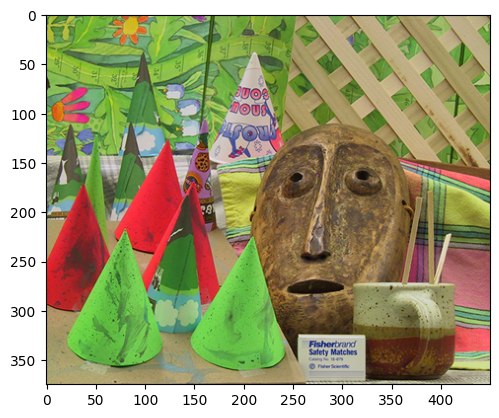

In [4]:
plt.imshow(cv2.cvtColor(right_image, cv2.COLOR_BGR2RGB))

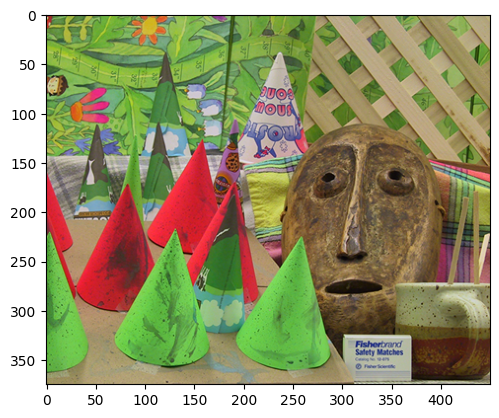

In [5]:
plt.imshow(cv2.cvtColor(left_image, cv2.COLOR_BGR2RGB))

In [6]:
D = np.zeros((left_gray.shape[0],left_gray.shape[1]+1,left_gray.shape[1]+1), dtype = np.float64)

In [7]:
def cost(row, D, i, j):
    if (i==1 and j==1):
      D[row][i][j] = ((left_gray[row][i-1] - right_gray[row][j-1])**2)/4
    else:
      dij = ((left_gray[row][i-1] - right_gray[row][j-1])**2)/4
      D[row][i][j] = np.min([D[row][i-1][j-1] + dij, D[row][i-1][j] + 1, D[row][i][j-1] + 1])

In [8]:
for row in range(D.shape[0]):
  for i in range(1, D.shape[1]):
    cost(row, D, i, 1)
  for j in range(2, D.shape[1]):
    cost(row, D, 1, j)
  for i in range(2, D.shape[1]):
    for j in range(2, D.shape[1]):
      cost(row, D, i, j)

In [9]:
D.shape

(375, 451, 451)

In [10]:
D[0]

array([[  0.  ,   0.  ,   0.  , ...,   0.  ,   0.  ,   0.  ],
       [  0.  ,  42.25,   1.  , ...,   1.  ,   1.  ,   1.  ],
       [  0.  ,   1.  ,   2.  , ...,   2.  ,   2.  ,   2.  ],
       ...,
       [  0.  ,   1.  ,   2.  , ..., 426.25, 427.25, 428.25],
       [  0.  ,   1.  ,   2.  , ..., 427.  , 428.  , 429.  ],
       [  0.  ,   1.  ,   2.  , ..., 426.5 , 427.5 , 428.5 ]])

In [11]:
D = D[:,1:,1:]
D.shape

(375, 450, 450)

In [12]:
dis_map_left = np.zeros(left_gray.shape, dtype = np.float64)
dis_map_right = np.zeros(left_gray.shape, dtype = np.float64)

In [16]:
for row in range(D.shape[0]):
  i = D.shape[1] - 1
  j = D.shape[1] - 1
  while(i >= 0 and j >= 0):
    min = np.argmin([D[row][i-1][j-1], D[row][i-1][j], D[row][i][j-1]])
    if (min == 0):
      dis_map_left[row][i] = abs(i - j)
      dis_map_right[row][j] = abs(i - j)
      i = i-1
      j = j-1
    elif(min == 1): # skipping a pixel in Il draw a vertical line
      i = i-1
    elif(min == 2): # skipping a pixel in Ir draw a horizontal line
      j = j-1


In [22]:
row = 5 # feel free to pick the row you want
positions = []
i = D.shape[1] - 1
j = D.shape[1] - 1
while(i >= 0 and j >= 0):
  min = np.argmin([D[row][i-1][j-1], D[row][i-1][j], D[row][i][j-1]])
  if (min == 0):
    i = i-1
    j = j-1
  elif(min == 1): # skipping a pixel in Il draw a vertical line
    i = i-1
  elif(min == 2): # skipping a pixel in Ir draw a horizontal line
    j = j-1
  positions.append([i, j])

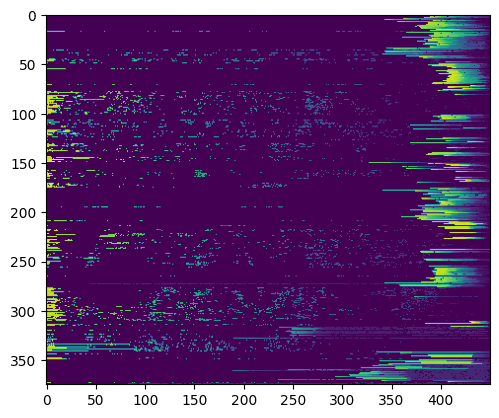

In [18]:
plt.imshow(dis_map_left)

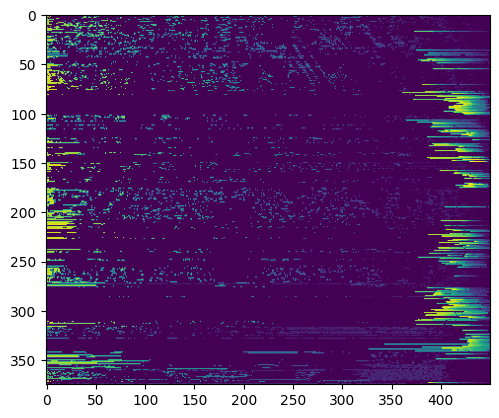

In [19]:
plt.imshow(dis_map_right)

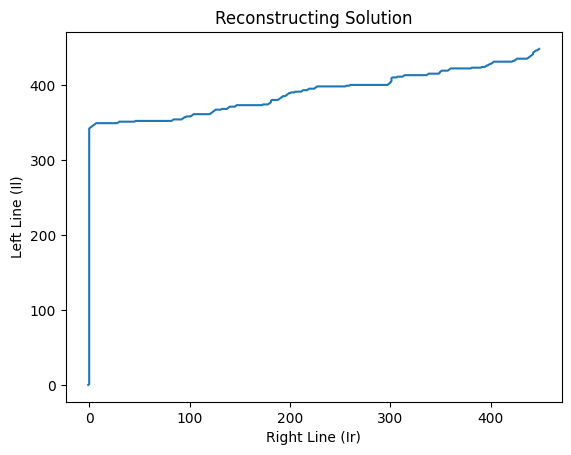

In [28]:
# extracting i and j values
i_values = [pos[0] for pos in positions]
j_values = [pos[1] for pos in positions]

# plotting
plt.plot(j_values, i_values);
plt.title('Reconstructing Solution');
plt.xlabel('Right Line (Ir)');
plt.ylabel('Left Line (Il)');